# The data is about Telco customer company where have a columns 21.
# customer churn is very big problem every company to understand why this problem happing that why i worked on this data.
# challenge faces while working the data is in caterories form.
# so i used logistic regression model.
# the model accuracy is 80 % .




In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.describe() #SeniorCitizen is +ve skewed.
#tenure is +ve skewed.
#MonthlyCharge is -ve skewed.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info() #SeniorCitizen is a int datatype.
#Tenure is also int datatype.
#monthlycharge are float datatype.
#except this 3 column remaining all are object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#dropping customerid columns
df.drop('customerID', axis=1, inplace= True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","TotalCharges","Churn"]]=oe.fit_transform(df[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","TotalCharges","Churn"]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [ ]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)
df["TotalCharges"]=df["TotalCharges"].astype(float)

nlmean=df["TotalCharges"].mean()

df["TotalCharges"].fillna(nlmean,inplace=True)

In [ ]:
df["TotalCharges"].isnull().sum()

0

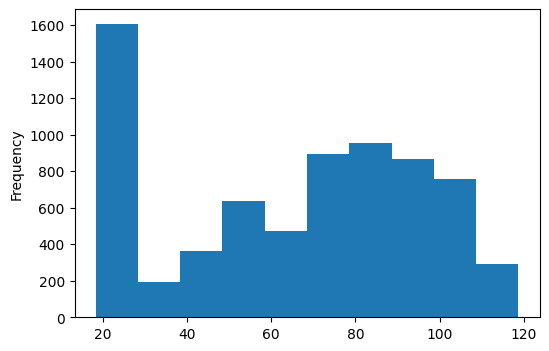

In [ ]:
plt.figure(figsize=(6,4))
df["MonthlyCharges"].plot(kind="hist")
plt.show()
#20 price charge is the highest monthly charges.

<Axes: xlabel='MultipleLines', ylabel='count'>

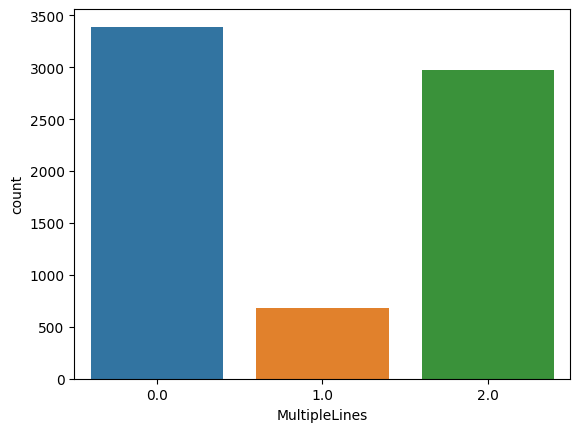

In [ ]:
sns.countplot(data=df,x="MultipleLines")


<Axes: xlabel='InternetService', ylabel='count'>

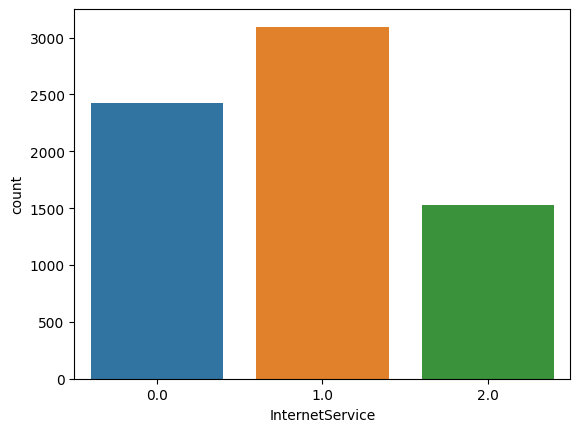

In [ ]:
sns.countplot(data=df,x="InternetService")
#fiber optic internetservice people are highest used,after that DSL are high used.

<Axes: ylabel='gender'>

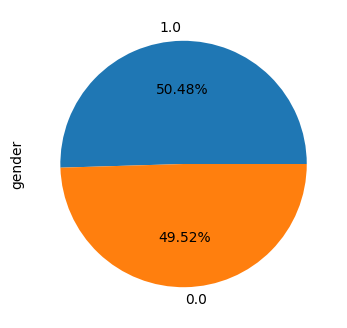

In [ ]:
df["gender"].value_counts().plot(figsize=(4,4),kind="pie",autopct="%.2f%%")
#they are almost equal

<Axes: ylabel='Churn'>

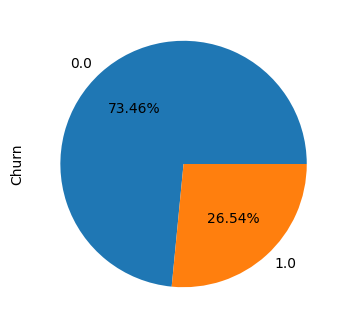

In [ ]:
df["Churn"].value_counts().plot(figsize=(4,4),kind="pie",autopct="%.2f%%")

<Axes: xlabel='Contract', ylabel='count'>

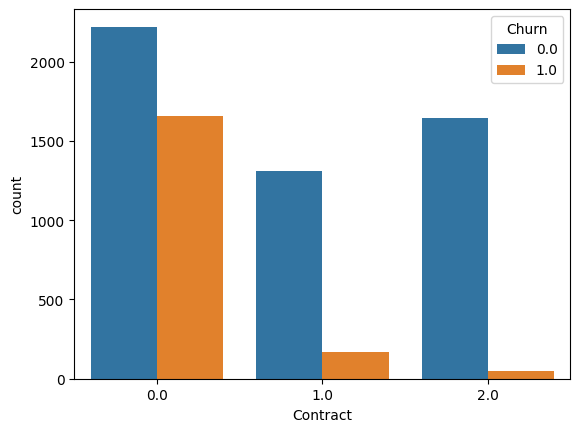

In [ ]:
sns.countplot(data=df,x="Contract",hue="Churn")

In [ ]:
df.iloc[755]

gender                 1.00
SeniorCitizen          1.00
Partner                0.00
Dependents             0.00
tenure                20.00
PhoneService           1.00
MultipleLines          2.00
InternetService        1.00
OnlineSecurity         0.00
OnlineBackup           0.00
DeviceProtection       2.00
TechSupport            0.00
StreamingTV            2.00
StreamingMovies        2.00
Contract               0.00
PaperlessBilling       1.00
PaymentMethod          2.00
MonthlyCharges        98.55
TotalCharges        1404.00
Churn                  1.00
Name: 755, dtype: float64

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
x.shape

(7043, 19)

In [ ]:
y.shape

(7043,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)


print(f"AC : {ac}\nCM :{cm}\nCR : {cr}")

AC : 0.8041163946061036
CM :[[1879  219]
 [ 333  387]]
CR :               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      2098
         1.0       0.64      0.54      0.58       720

    accuracy                           0.80      2818
   macro avg       0.74      0.72      0.73      2818
weighted avg       0.80      0.80      0.80      2818

